# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='white'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('https://docs.google.com/spreadsheets/d/1HDbKn3ABelIagBPw_jCmWtkKix84liTlL1mH28YeS3g/edit?usp=drive_web&ouid=112634510710393940393')

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv('marketing_campaign_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


using info function and describe, we can pull the following information from df : <br> 
>- we have 3 catagorical variables and 27 numerical variables
>- we have missing values for the __Income__ Variable  

### *Transform Uncorrect Dtypes*








In [ ]:
#change Dt_Customer dtype from object to datetime 64[ns]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### *Feature Extraction*

In [ ]:
df_fe = df.copy()

In [ ]:
#create total accepted campaign
df_fe['Total_Acc_Cmp'] = df_fe['AcceptedCmp1']+df_fe['AcceptedCmp2']+df_fe['AcceptedCmp3']+df_fe['AcceptedCmp4']+df_fe['AcceptedCmp5']

#create total purchases feature
df_fe['Total_Purchases'] = df_fe['NumDealsPurchases']+df_fe['NumWebPurchases']+df_fe['NumCatalogPurchases']+df_fe['NumStorePurchases']

#create conversion rate feature
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df_fe['cvr'] = df_fe.apply(lambda x: safe_div(x['Total_Purchases'],x['NumWebVisitsMonth']), axis=1)

#create age feature
df_fe['Age'] = 2022 - df_fe['Year_Birth']

#create age group
age_list=[]
for i in df_fe['Age']:
    if i >= 0 and i <= 1:
        group = 'Infant'
    elif i >= 2 and i <= 4:
        group = 'Toddler'
    elif i >= 5 and i <= 12:
        group = 'Child'
    elif i >= 13 and i <= 19:
        group = 'Teen'
    elif i >= 20 and i <= 39:
        group = 'Adult'
    elif i >= 40 and i <= 59:
        group = 'Middle Aged'
    else:
        group = 'Senior Citizen'
    age_list.append(group)
df_fe['Age_Group'] = age_list

#create total spend feature
df_fe['Total_Spent'] = df_fe['MntCoke']+df_fe['MntFishProducts']+df_fe['MntFruits']+df_fe['MntMeatProducts']+df_fe['MntSweetProducts']+df_fe['MntGoldProds']

#create ammount of children feature
df_fe['NumChildren'] = df_fe['Kidhome']+df_fe['Teenhome']

#create total of days joined
df_fe['Dt_Collected'] = date.today()
df_fe['Dt_Collected'] = df_fe['Dt_Collected'].astype('datetime64[ns]')
df_fe['Dt_Days_Customer'] = df_fe['Dt_Collected'] - df_fe['Dt_Customer']
df_fe['Dt_Days_Customer'] = df_fe['Dt_Days_Customer'].dt.days

In [ ]:
df_fe.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Acc_Cmp,Total_Purchases,cvr,Age,Age_Group,Total_Spent,NumChildren,Dt_Collected,Dt_Days_Customer
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,25,3.571429,65,Senior Citizen,1617000,0,2023-01-21,3939
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,6,1.200000,68,Senior Citizen,27000,2,2023-01-21,3093
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,21,5.250000,57,Middle Aged,776000,0,2023-01-21,3440
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,8,1.333333,38,Adult,53000,1,2023-01-21,3033
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,19,3.800000,41,Middle Aged,422000,1,2023-01-21,3289


### *Drop Unnecessary Features for EDA*

In [ ]:
df_fe.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Collected'], inplace=True, axis=1)

In [ ]:
df_fe.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Acc_Cmp,Total_Purchases,cvr,Age,Age_Group,Total_Spent,NumChildren,Dt_Days_Customer
0,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,0,25,3.571429,65,Senior Citizen,1617000,0,3939
1,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,0,6,1.200000,68,Senior Citizen,27000,2,3093
2,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,0,21,5.250000,57,Middle Aged,776000,0,3440
3,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,0,8,1.333333,38,Adult,53000,1,3033
4,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,0,19,3.800000,41,Middle Aged,422000,1,3289


# **Exploratory Data Analysis**

### *Univariate Analysis*

In [ ]:
df_eda = df_fe.copy()

In [ ]:
df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'NumChildren', 'Total_Acc_Cmp']] = df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'NumChildren', 'Total_Acc_Cmp']].astype('object')

In [ ]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
dat = []
for col in df_eda.columns: 
    if df_eda[col].dtype == 'O':
        cat.append(col)
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        num.append(col)
    else:
        dat.append(col)

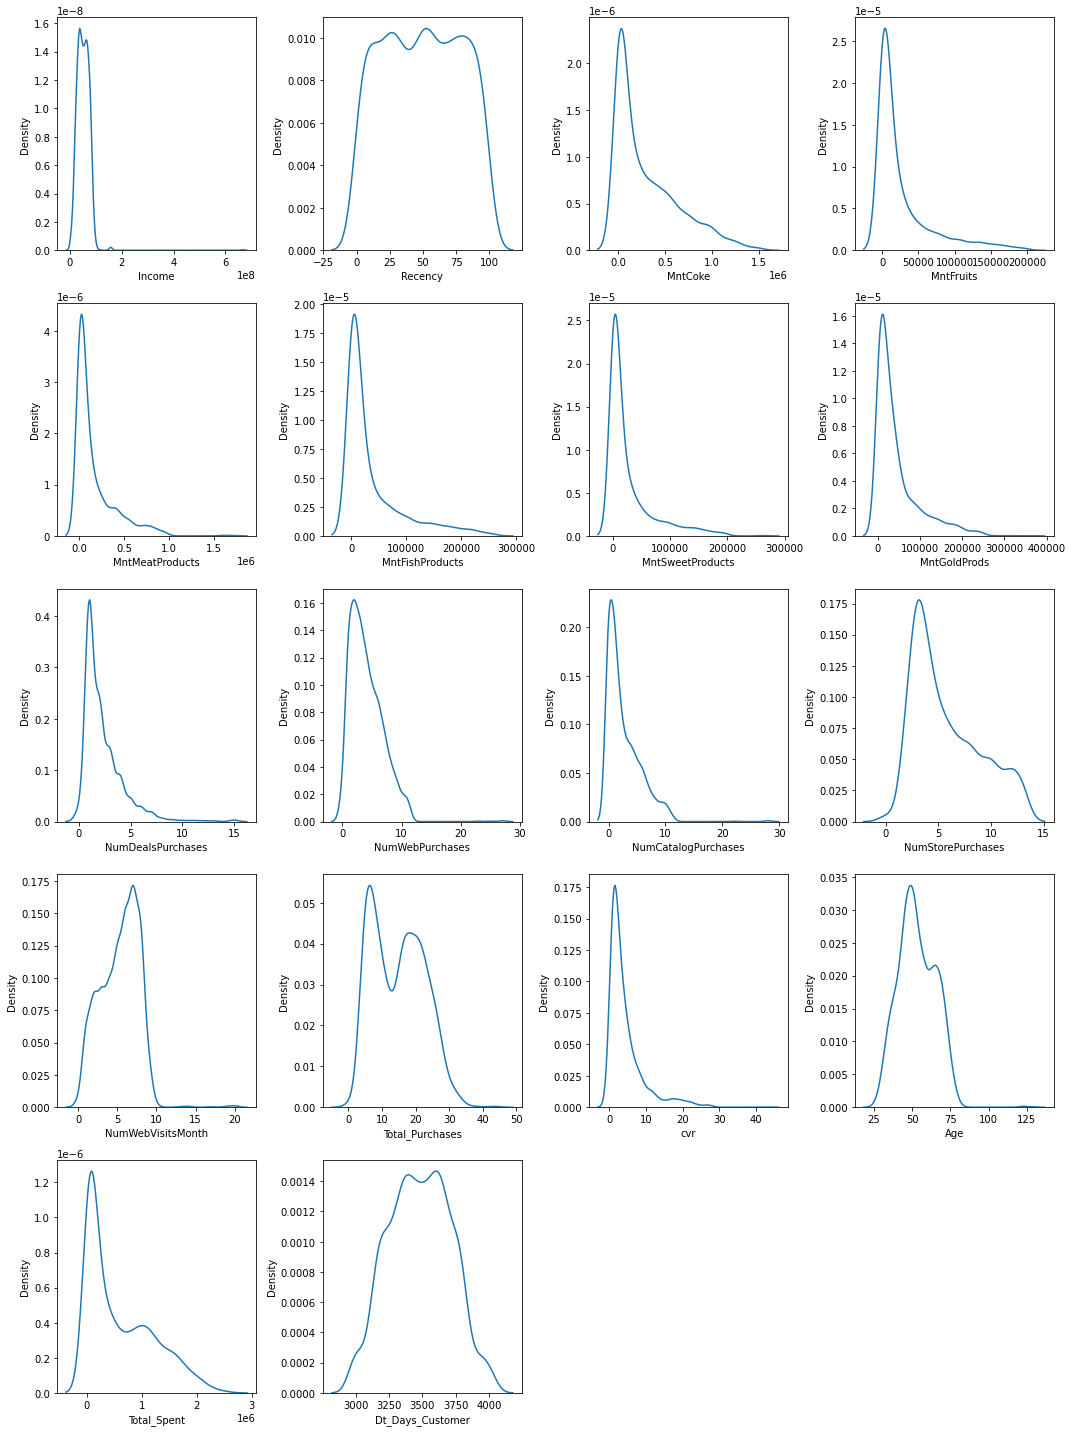

In [ ]:
plt.figure(figsize= (15, 20))
for i in range(len(num)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x = df_eda[num[i]])
    plt.tight_layout()

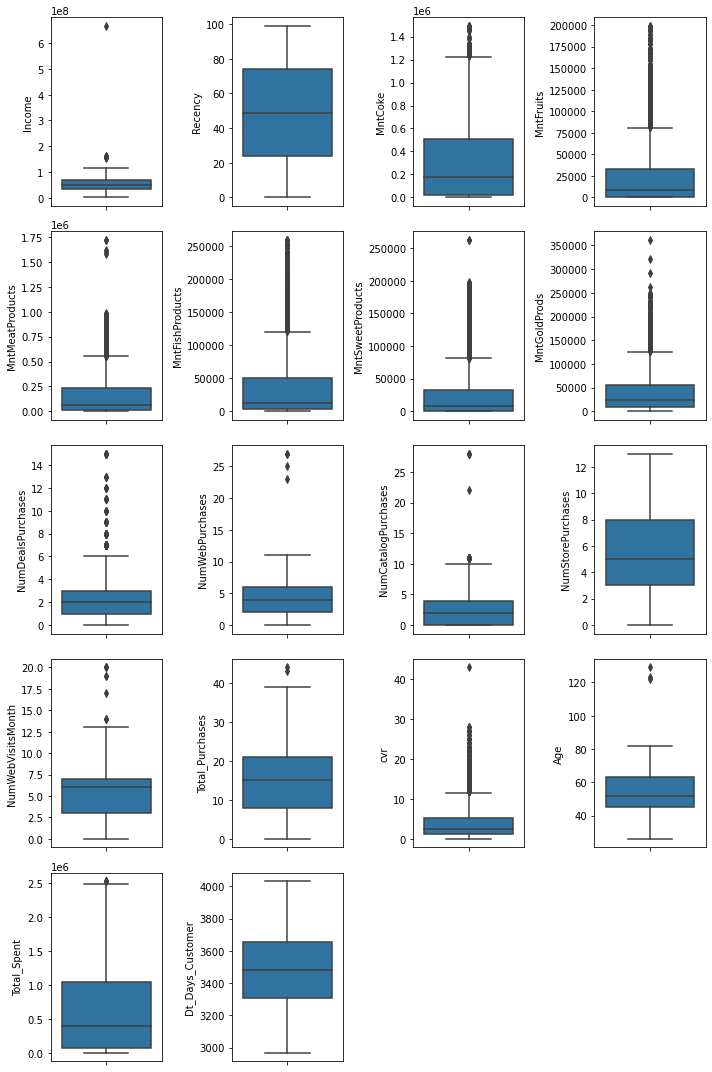

In [ ]:
plt.figure(figsize= (10,15))
for i in range(len(num)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y = df_eda[num[i]], orient='v')
    plt.tight_layout()

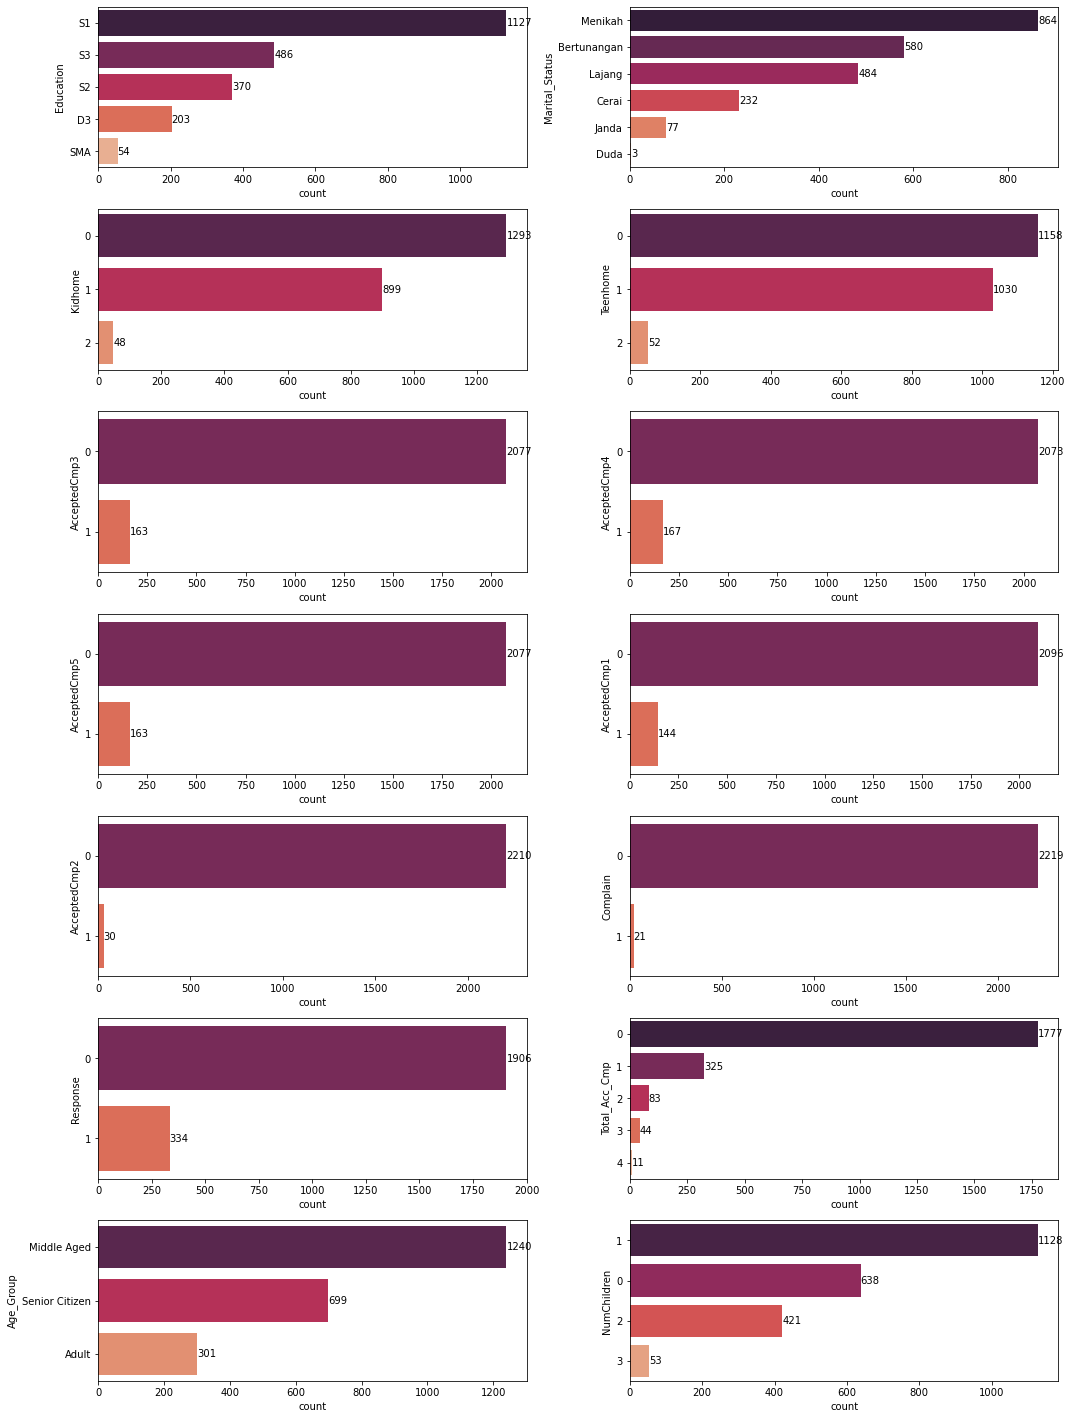

In [ ]:
plt.figure(figsize=(15, 25))
for i in range(len(cat)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=cat[i], data=df_eda, palette='rocket', order=df_eda[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

In [ ]:
df_eda[dat].describe()

,Dt_Customer
count,2240
unique,663
top,2012-08-31 00:00:00
freq,12
first,2012-01-08 00:00:00
last,2014-12-06 00:00:00


### *Multivariate Analysis*

<AxesSubplot:>

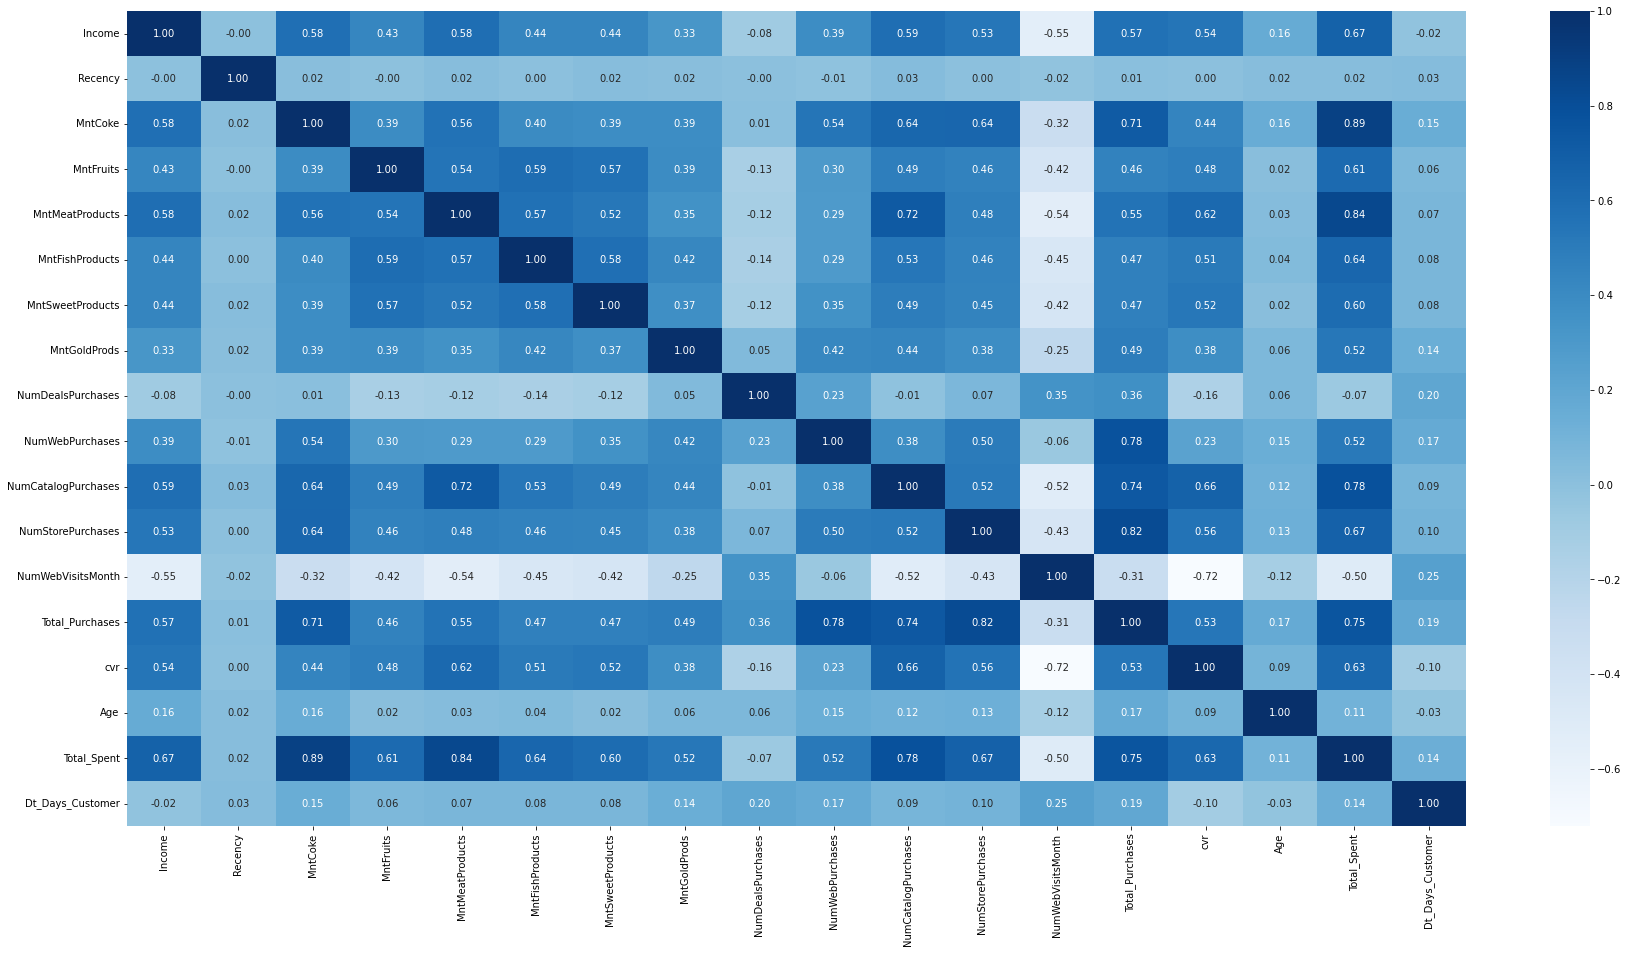

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_eda.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df_task1 = df_eda.groupby('Age_Group').agg({'cvr':'sum'}).reset_index()
df_task1['sum_cvr'] = df_task1['cvr'].sum()
df_task1['pct'] = round((df_task1['cvr']/df_task1['sum_cvr'])*100, 2)
df_task1

,Age_Group,cvr,sum_cvr,pct
0,Adult,1396.827026,9845.297974,14.19
1,Middle Aged,4731.134441,9845.297974,48.05
2,Senior Citizen,3717.336508,9845.297974,37.76


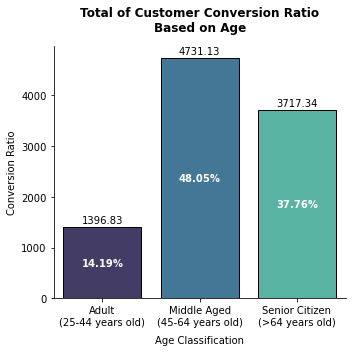

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Total of Customer Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Age_Group', y='cvr', data=df_task1, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['14.19%', '48.05%', '37.76%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.savefig('customer_cvr.png')

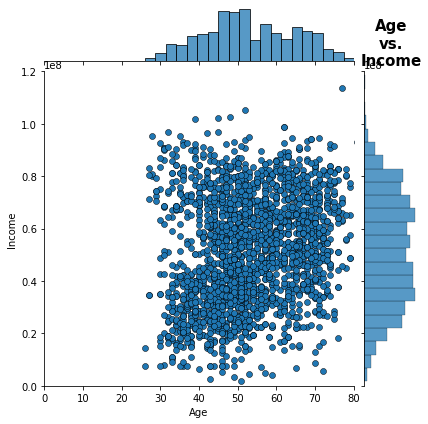

In [ ]:
plot = sns.jointplot(x=df_eda['Age'], y=df_eda['Income'], edgecolor='black')
plt.title('Age\nvs.\nIncome', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.savefig('age_income_jointplot.png')
plt.show()

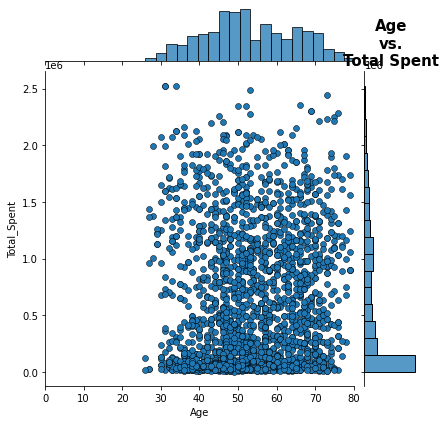

In [ ]:
plot = sns.jointplot(x=df_eda['Age'], y=df_eda['Total_Spent'], edgecolor='black')
plt.title('Age\nvs.\nTotal Spent', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_totspent_jointplot.png')
plt.show()

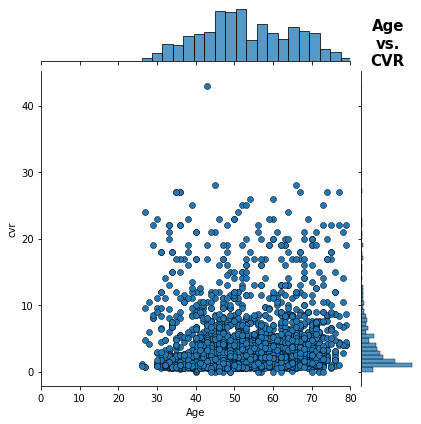

In [ ]:
plot = sns.jointplot(x=df_eda['Age'], y=df_eda['cvr'], edgecolor='black')
plt.title('Age\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_cvr_jointplot.png')
plt.show()

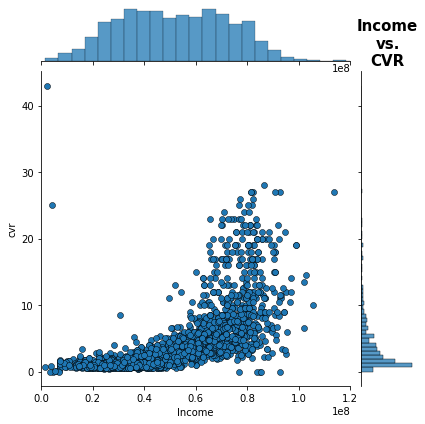

In [ ]:
plot = sns.jointplot(x=df_eda['Income'], y=df_eda['cvr'], edgecolor='black')
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.savefig('income_cvr_jointplot.png')
plt.show()

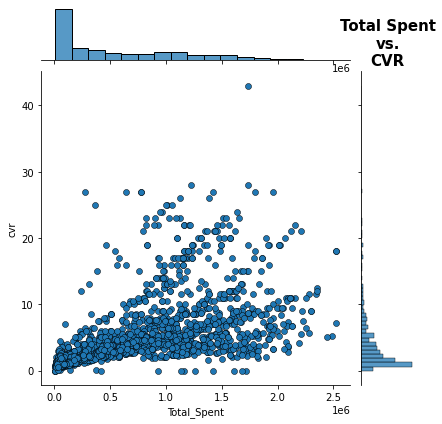

<Figure size 432x288 with 0 Axes>

In [ ]:
plot = sns.jointplot(x=df_eda['Total_Spent'], y=df_eda['cvr'], edgecolor='black')
plt.title('Total Spent\nvs.\nCVR', fontsize=15, weight='bold')
plt.savefig('totspent_cvr_jointplot.png')
plt.show()
plt.tight_layout()

# **Data Preprocessing**

In [ ]:
df_final = df_eda.copy()

### *Handling Missing Value*

In [ ]:
missing_value = df_final.isna().sum()*100/len(df_final)
print(round(missing_value, 4).sort_values(ascending=False))

Income                 1.0714
Education              0.0000
Total_Acc_Cmp          0.0000
AcceptedCmp4           0.0000
AcceptedCmp5           0.0000
AcceptedCmp1           0.0000
AcceptedCmp2           0.0000
Complain               0.0000
Response               0.0000
Total_Purchases        0.0000
NumWebVisitsMonth      0.0000
cvr                    0.0000
Age                    0.0000
Age_Group              0.0000
Total_Spent            0.0000
NumChildren            0.0000
AcceptedCmp3           0.0000
NumStorePurchases      0.0000
Marital_Status         0.0000
NumCatalogPurchases    0.0000
NumWebPurchases        0.0000
NumDealsPurchases      0.0000
MntGoldProds           0.0000
MntSweetProducts       0.0000
MntFishProducts        0.0000
MntMeatProducts        0.0000
MntFruits              0.0000
MntCoke                0.0000
Recency                0.0000
Dt_Customer            0.0000
Teenhome               0.0000
Kidhome                0.0000
Dt_Days_Customer       0.0000
dtype: flo

In [ ]:
#fill income missing value wih median
df_final['Income'] = df_final['Income'].fillna(df_final['Income'].median())

### *Handling Duplicated Data*

In [ ]:
df_final.duplicated().sum()

183

In [ ]:
df_fe[df_fe.duplicated(keep='first')].head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Acc_Cmp,Total_Purchases,cvr,Age,Age_Group,Total_Spent,NumChildren,Dt_Days_Customer
83,S2,Bertunangan,38620000.0,0,0,2013-11-05,56,112000,17000,44000,34000,22000,89000,1,2,5,3,3,0,0,0,0,0,0,0,0,11,3.666667,59,Middle Aged,318000,0,3364
179,D3,Menikah,78497000.0,0,0,2013-01-12,44,207000,26000,447000,75000,0,223000,1,5,7,12,2,0,0,0,1,0,0,0,1,25,12.500000,71,Senior Citizen,978000,0,3661
281,S1,Bertunangan,51369000.0,0,1,2012-10-25,84,297000,7000,79000,0,11000,182000,2,8,2,4,8,0,0,0,0,0,0,0,0,16,2.000000,46,Middle Aged,576000,1,3740
282,S1,Bertunangan,37760000.0,0,0,2012-08-31,20,84000,5000,38000,150000,12000,28000,2,4,1,6,7,0,0,0,0,0,0,0,0,13,1.857143,76,Senior Citizen,317000,0,3795
363,S3,Menikah,37717000.0,1,0,2012-11-23,31,9000,0,6000,4000,1000,5000,1,1,0,2,9,0,0,0,0,0,0,0,0,4,0.444444,44,Middle Aged,25000,1,3711
383,D3,Menikah,35688000.0,2,1,2012-08-22,94,73000,3000,90000,12000,1000,32000,7,4,1,4,8,0,0,0,0,0,0,0,0,16,2.000000,49,Middle Aged,211000,3,3804
421,S1,Menikah,30096000.0,1,0,2014-05-22,30,5000,3000,11000,12000,5000,9000,1,2,0,3,6,0,0,0,0,0,0,0,0,6,1.000000,39,Adult,45000,1,3166
443,S1,Lajang,30279000.0,1,0,2012-12-30,13,10000,4000,14000,4000,4000,1000,1,1,0,3,8,0,0,0,0,0,0,0,0,5,0.625000,33,Adult,37000,1,3674
463,S1,Menikah,80124000.0,0,0,2014-06-26,47,483000,84000,398000,205000,84000,241000,1,3,7,8,1,1,0,0,0,0,0,0,1,19,19.000000,59,Middle Aged,1495000,0,3131
504,S2,Bertunangan,50943000.0,0,1,2013-06-21,49,31000,0,7000,2000,0,6000,1,1,0,3,5,0,0,0,0,0,0,0,0,5,1.000000,66,Senior Citizen,46000,1,3501


In [ ]:
df_fe[df_fe.duplicated(keep='last')].head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Acc_Cmp,Total_Purchases,cvr,Age,Age_Group,Total_Spent,NumChildren,Dt_Days_Customer
15,S3,Lajang,82800000.0,0,0,2012-11-24,23,1006000,22000,115000,59000,68000,45000,1,7,6,12,3,0,0,1,1,0,0,1,2,26,8.666667,76,Senior Citizen,1315000,0,3710
17,S1,Bertunangan,37760000.0,0,0,2012-08-31,20,84000,5000,38000,150000,12000,28000,2,4,1,6,7,0,0,0,0,0,0,0,0,13,1.857143,76,Senior Citizen,317000,0,3795
23,S3,Menikah,65324000.0,0,1,2014-11-01,0,384000,0,102000,21000,32000,5000,3,6,2,9,4,0,0,0,0,0,0,0,0,20,5.000000,68,Senior Citizen,544000,1,3003
24,S1,Bertunangan,40689000.0,0,1,2013-03-18,69,270000,3000,27000,39000,6000,99000,7,7,1,5,8,0,0,0,0,0,0,0,0,20,2.500000,71,Senior Citizen,444000,1,3596
29,S3,Menikah,84618000.0,0,0,2013-11-22,96,684000,100000,801000,21000,66000,0,1,6,9,10,2,0,0,1,0,0,0,0,1,26,13.000000,57,Middle Aged,1672000,0,3347
30,S2,Cerai,10979000.0,0,0,2014-05-22,34,8000,4000,10000,2000,2000,4000,2,3,0,3,5,0,0,0,0,0,0,0,0,8,1.600000,33,Adult,30000,0,3166
31,S2,Bertunangan,38620000.0,0,0,2013-11-05,56,112000,17000,44000,34000,22000,89000,1,2,5,3,3,0,0,0,0,0,0,0,0,11,3.666667,59,Middle Aged,318000,0,3364
38,S1,Janda,42429000.0,0,1,2014-11-02,99,55000,0,6000,2000,0,4000,2,1,1,3,5,0,0,0,0,0,0,0,0,7,1.400000,49,Middle Aged,67000,1,3002
39,S3,Cerai,48948000.0,0,0,2013-01-02,53,437000,8000,206000,160000,49000,42000,2,7,10,5,6,1,0,0,0,0,0,1,1,24,4.000000,79,Senior Citizen,902000,0,3671
42,S1,Bertunangan,21994000.0,0,1,2012-12-24,4,9000,0,6000,3000,1000,3000,1,0,0,3,5,0,0,0,0,0,0,0,0,4,0.800000,65,Senior Citizen,22000,1,3680


***Based on .duplicated() function there are 183 duplicated rows of data. But, when I try to look for it manually, i couldn't find any single of duplicated row. Then I decide to not eliminate any of this single row of data.***

In [ ]:
df_final.shape

(2240, 33)

### *Drop Unnecesary Feature*

In [ ]:
df_final.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 'MntGoldProds',
                'Kidhome','Teenhome', 'Response'], inplace=True, axis=1)

## **Feature Engineering**

### *Feature Selection*

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2240 non-null   object        
 1   Marital_Status     2240 non-null   object        
 2   Income             2240 non-null   float64       
 3   Dt_Customer        2240 non-null   datetime64[ns]
 4   Recency            2240 non-null   int64         
 5   NumWebVisitsMonth  2240 non-null   int64         
 6   Complain           2240 non-null   object        
 7   Total_Acc_Cmp      2240 non-null   object        
 8   Total_Purchases    2240 non-null   int64         
 9   cvr                2240 non-null   float64       
 10  Age                2240 non-null   int64         
 11  Age_Group          2240 non-null   object        
 12  Total_Spent        2240 non-null   int64         
 13  NumChildren        2240 non-null   object        
 14  Dt_Days_

<AxesSubplot:>

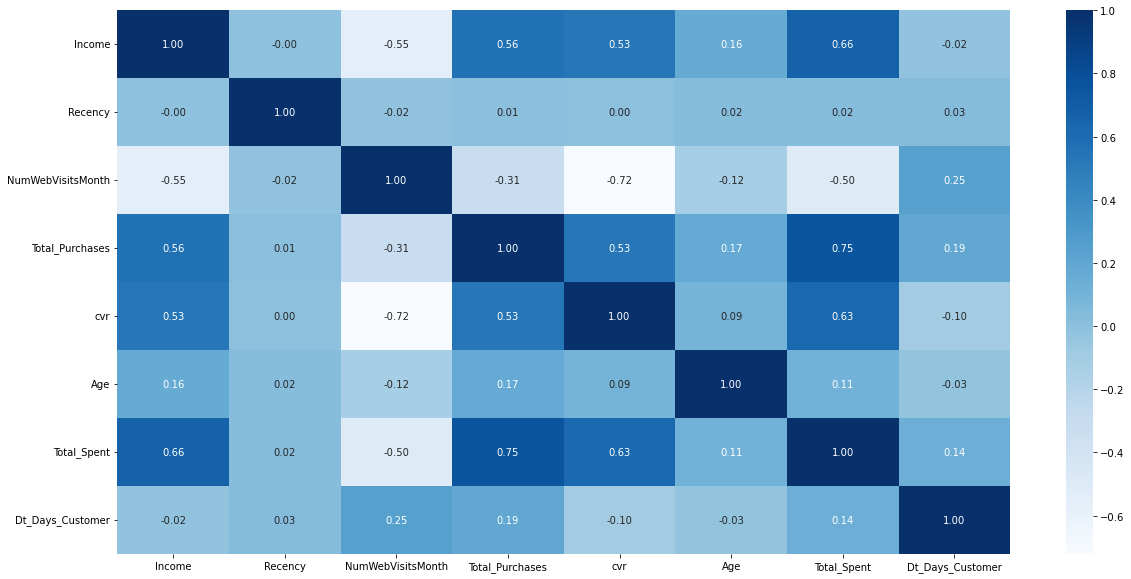

In [ ]:

plt.figure(figsize=(20, 10))
sns.heatmap(df_final.corr(), cmap='Blues', annot=True, fmt='.2f')

Kolom yang akan dipilih berdasarkan RFM degan metode reduce dimensionality: 
1. R: Recency
2. F: Total_Purchases
3. M: Spent
4. L: Age
5. C: Total_Acc_Cmp

In [ ]:
df_rd = df_final.copy()
df_rd = df_rd[['Recency', 'Total_Purchases', 'Total_Spent', 'Dt_Days_Customer', 'Age']]
df_rd.columns = ['R', 'F', 'M', 'L', 'C']
df_rd.describe(include='all')

,R,F,M,L,C
count,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,49.109375,14.862054,6.057982e+05,3480.043304,53.194196
std,28.962453,7.677173,6.022493e+05,232.229893,11.984069
min,0.000000,0.000000,5.000000e+03,2968.000000,26.000000
25%,24.000000,8.000000,6.875000e+04,3308.750000,45.000000
50%,49.000000,15.000000,3.960000e+05,3481.000000,52.000000
75%,74.000000,21.000000,1.045500e+06,3653.250000,63.000000
max,99.000000,44.000000,2.525000e+06,4031.000000,129.000000


<AxesSubplot:>

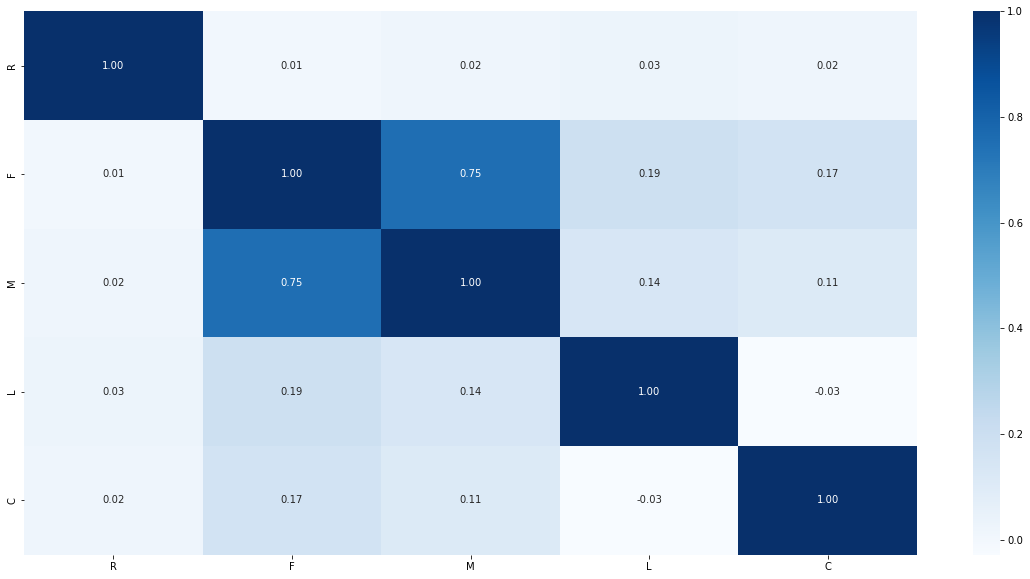

In [ ]:

plt.figure(figsize=(20, 10))
sns.heatmap(df_rd.corr(), cmap='Blues', annot=True, fmt='.2f')

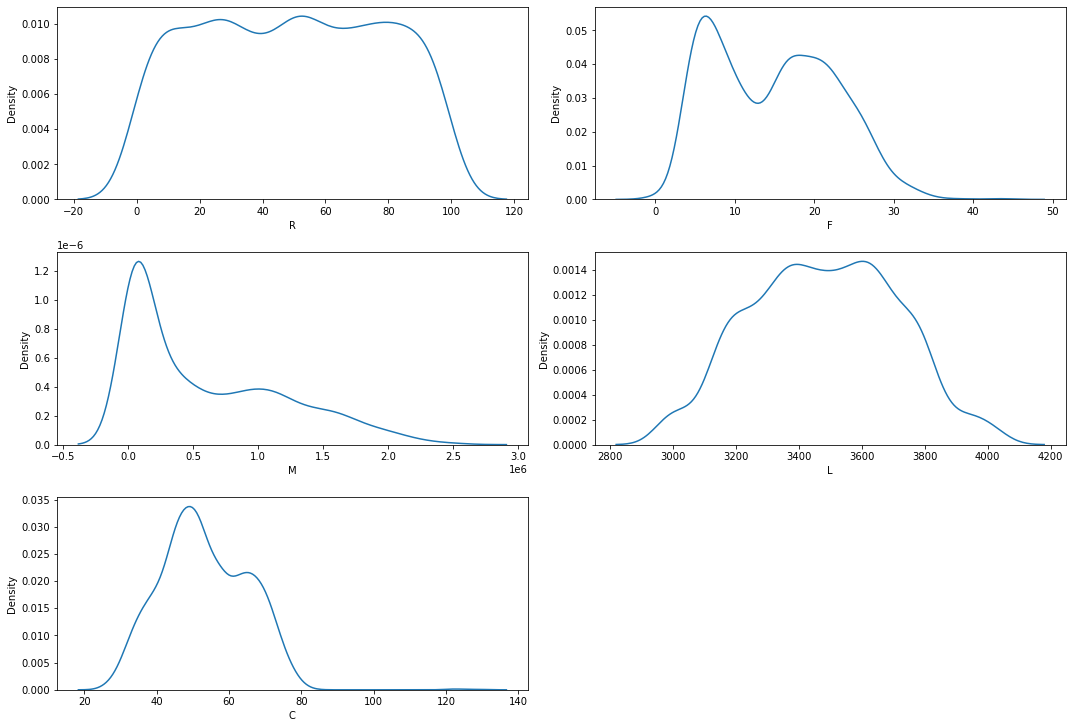

In [ ]:
cols = df_rd.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = df_rd[cols[i]])
    plt.tight_layout()

In [ ]:
df_rd.shape

(2240, 5)

### *Handling Outliers*

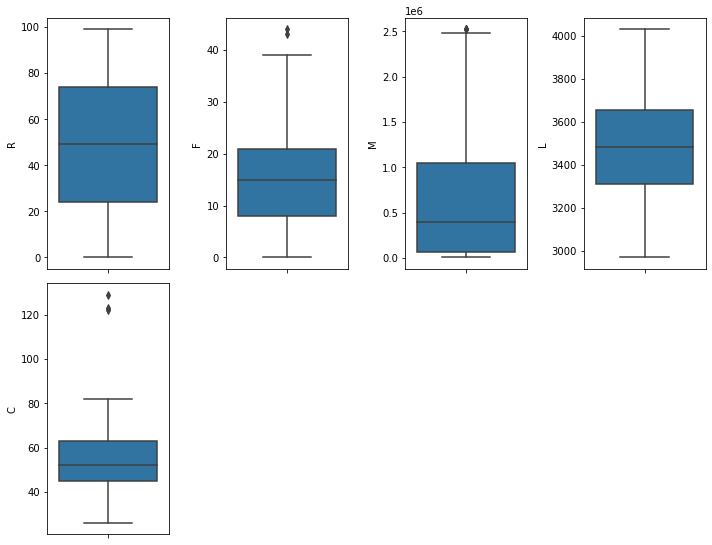

In [ ]:
cols = df_rd.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_rd[cols[i]], orient='v')
    plt.tight_layout()

In [ ]:
for col in cols:
    high_cut = df_rd[col].quantile(q=0.99)
    low_cut= df_rd[col].quantile(q=0.01)
    df_rd.loc[df_rd[col]>high_cut,col]=high_cut
    df_rd.loc[df_rd[col]<low_cut,col]=low_cut

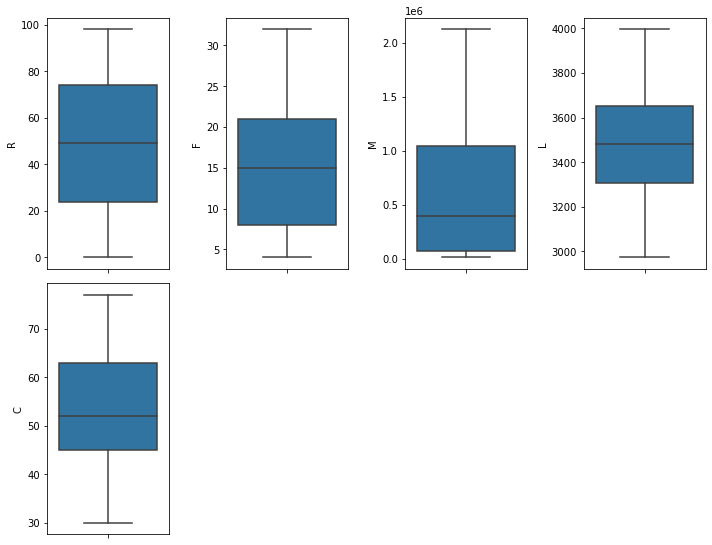

In [ ]:
cols = df_rd.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_rd[cols[i]], orient='v')
    plt.tight_layout()

### *Feature Transformation*

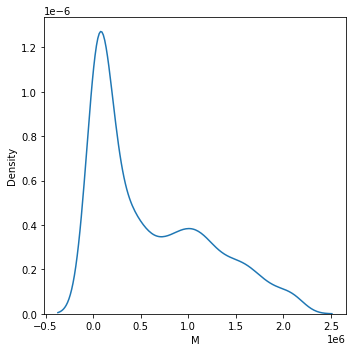

In [ ]:
#column M distribution is right-skewed

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_rd['M'])
plt.tight_layout()

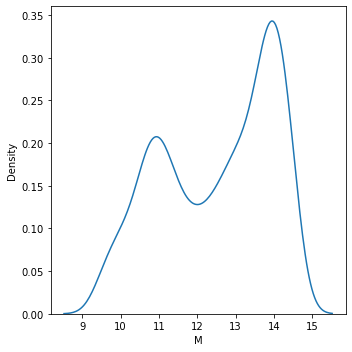

In [ ]:
#log tranformation on column `M`

df_rd_log = df_rd.copy()
df_rd_log['M'] = np.log(df_rd['M'])

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_rd_log['M'])
plt.tight_layout()

In [ ]:
df_rd_log.describe()

,R,F,M,L,C
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,49.101786,14.854911,12.520340,3479.836174,53.132143
std,28.949501,7.591392,1.475319,231.617801,11.666094
min,0.000000,4.000000,9.472705,2973.000000,30.000000
25%,24.000000,8.000000,11.138212,3308.750000,45.000000
50%,49.000000,15.000000,12.889169,3481.000000,52.000000
75%,74.000000,21.000000,13.860005,3653.250000,63.000000
max,98.000000,32.000000,14.569753,3996.610000,77.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
col_name = list(df_rd_log.columns)

mm = MinMaxScaler()
df_std_mm = mm.fit_transform(df_rd_log)
df_std_mm = pd.DataFrame(df_std_mm, columns=col_name)
df_std_mm.sample(10)

,R,F,M,L,C
4,0.959184,0.535714,0.682759,0.308711,0.234043
92,0.887755,0.392857,0.849059,0.364397,0.404255
1588,0.112245,0.464286,0.555854,0.413243,0.255319
698,0.469388,0.571429,0.763236,0.615469,0.659574
1235,0.479592,0.750000,0.809467,0.184641,0.446809
1278,0.969388,0.642857,0.886481,0.782525,0.297872
827,0.765306,0.071429,0.199835,0.356581,0.638298
496,0.224490,0.071429,0.234695,0.206133,0.297872
674,0.642857,0.428571,0.850052,1.000000,0.361702
1902,0.959184,0.392857,0.670778,0.252049,0.106383


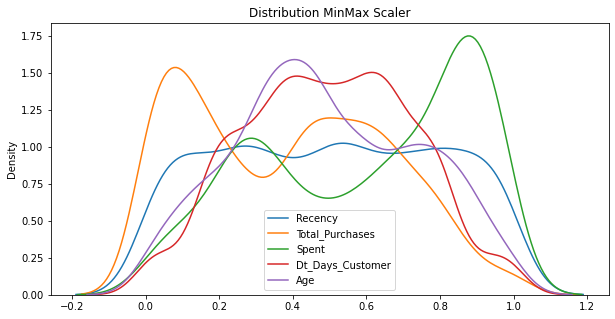

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(df_std_mm['R'], label = 'Recency')
sns.kdeplot(df_std_mm['F'], label = 'Total_Purchases')
sns.kdeplot(df_std_mm['M'], label = 'Spent')
sns.kdeplot(df_std_mm['L'], label = 'Dt_Days_Customer')
sns.kdeplot(df_std_mm['C'], label = 'Age')
plt.xlabel(None)
plt.legend()
plt.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_std_mm.describe()

,R,F,M,L,C
count,2240.000,2240.000,2240.000,2240.000,2240.000
mean,0.501,0.388,0.598,0.495,0.492
std,0.295,0.271,0.289,0.226,0.248
min,0.000,0.000,0.000,0.000,0.000
25%,0.245,0.143,0.327,0.328,0.319
50%,0.500,0.393,0.670,0.496,0.468
75%,0.755,0.607,0.861,0.665,0.702
max,1.000,1.000,1.000,1.000,1.000


# **Modeling and Evaluation**

## *Inertia*

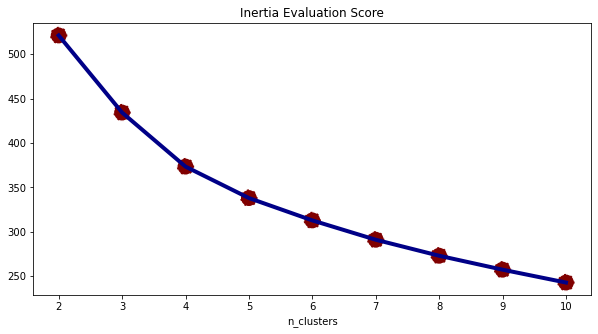

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_mm)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

## *Silhoutte*

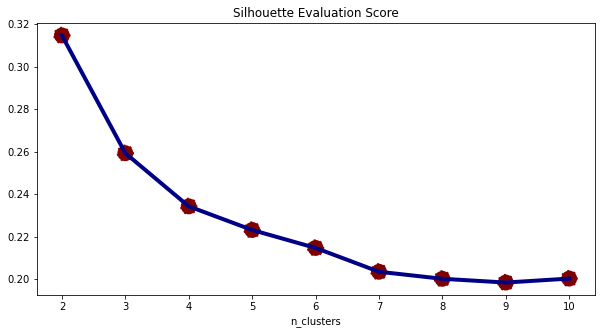

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_mm)
    preds = kmeans.predict(df_std_mm)
    score_euclidean = silhouette_score(df_std_mm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [ ]:
df_std_cluster = df_std_mm.copy()
df_cluster = df_rd.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std_mm)
df_std_cluster['clusters'] = kmeans.labels_
df_cluster['clusters'] = kmeans.labels_

In [ ]:
df_cluster.sample(10)

,R,F,M,L,C,clusters
1134,74,21,2013000,3371.000,37,0
1100,78,17,1862000,3451.000,47,0
1053,1,7,56000,3628.000,52,3
2171,77,27,1199000,3494.000,52,0
1377,5,7,68000,3441.000,37,3
2117,50,27,1038000,3287.000,70,0
168,46,15,1117000,3631.000,34,2
944,86,9,66000,3682.000,36,1
544,56,20,662000,3577.000,46,0
1375,1,17,371000,3996.000,62,2


## *PCA*

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
pca = PCA(n_components=2)

pca.fit(df_std_mm)
pcs = pca.transform(df_std_mm)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.sample(10)

,PC 1,PC 2,clusters
1614,0.577,0.245,3
1156,-0.311,0.409,2
2207,0.314,-0.287,1
1735,-0.579,0.040,0
680,-0.371,-0.003,0
1960,-0.476,0.126,2
1217,0.053,-0.019,1
265,0.223,0.179,3
1683,0.774,-0.050,3
2217,-0.299,-0.041,0


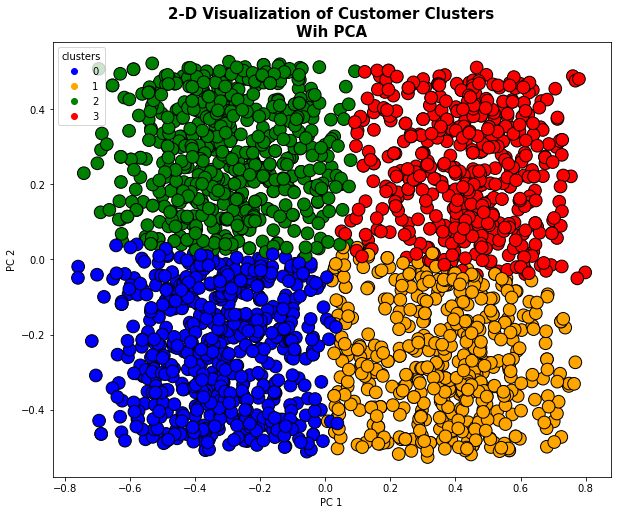

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

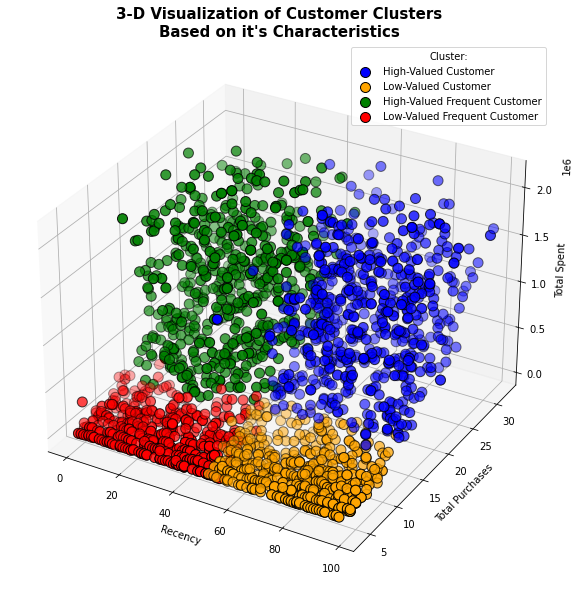

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_cluster['R'][df_cluster.clusters == 0], df_cluster['F'][df_cluster.clusters == 0], df_cluster['M'][df_cluster.clusters == 0], c='blue', s=100, edgecolor='black', label='High-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 1], df_cluster['F'][df_cluster.clusters == 1], df_cluster['M'][df_cluster.clusters == 1], c='orange', s=100, edgecolor='black', label='Low-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 2], df_cluster['F'][df_cluster.clusters == 2], df_cluster['M'][df_cluster.clusters == 2], c='green', s=100, edgecolor='black', label='High-Valued Frequent Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 3], df_cluster['F'][df_cluster.clusters == 3], df_cluster['M'][df_cluster.clusters == 3], c='red', s=100, edgecolor='black', label='Low-Valued Frequent Customer')
plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()

## *Insights*

In [ ]:
display(df_cluster.groupby('clusters').agg(['mean','median', 'max', 'min']))

R                     F                          M             \
           mean median max min   mean median max min        mean     median   
clusters                                                                      
0        73.003 72.000  98  45 20.636 20.000  32   4 1031209.877 986500.000   
1        74.414 76.000  98  43  7.757  7.000  16   4   92622.718  65000.000   
2        22.918 23.000  49   0 20.592 20.000  32  10  985977.087 936000.000   
3        24.576 24.000  53   0  7.166  7.000  15   4   75397.541  57000.000   

                                 L                                 C         \
              max     min     mean   median      max      min   mean median   
clusters                                                                      
0         2126000  199000 3527.186 3535.000 3996.610 2973.000 55.864 56.000   
1          414000   13000 3438.107 3433.000 3996.610 2973.000 52.034 51.000   
2         2126000  215000 3501.965 3515.000 3996.610 2973.000 54.540 54.000   
3          393000   13000 3431.413 3413.000 3996.610 2973.000 48.850 48.000   

                  
         max min  
clusters          
0         77  30  
1         77  30  
2         77  30  
3         77  30

In [ ]:
df_tc = df_cluster.groupby('clusters').agg({'R':'count'}).reset_index()
df_tc = df_tc.rename(columns={'R':'total_customers'})
df_tc['sum_customers'] = df_tc['total_customers'].sum()
df_tc['pct'] = round((df_tc['total_customers']/df_tc['sum_customers'])*100, 2)
df_tc

,clusters,total_customers,sum_customers,pct
0,0,648,2240,28.930
1,1,493,2240,22.010
2,2,611,2240,27.280
3,3,488,2240,21.790


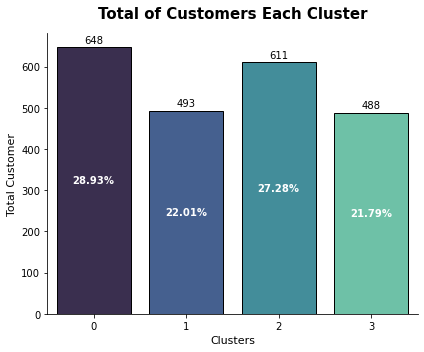

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='clusters', y='total_customers', data=df_tc, edgecolor='black', palette='mako')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['28.93%', '22.01%', '27.28%', '21.79%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

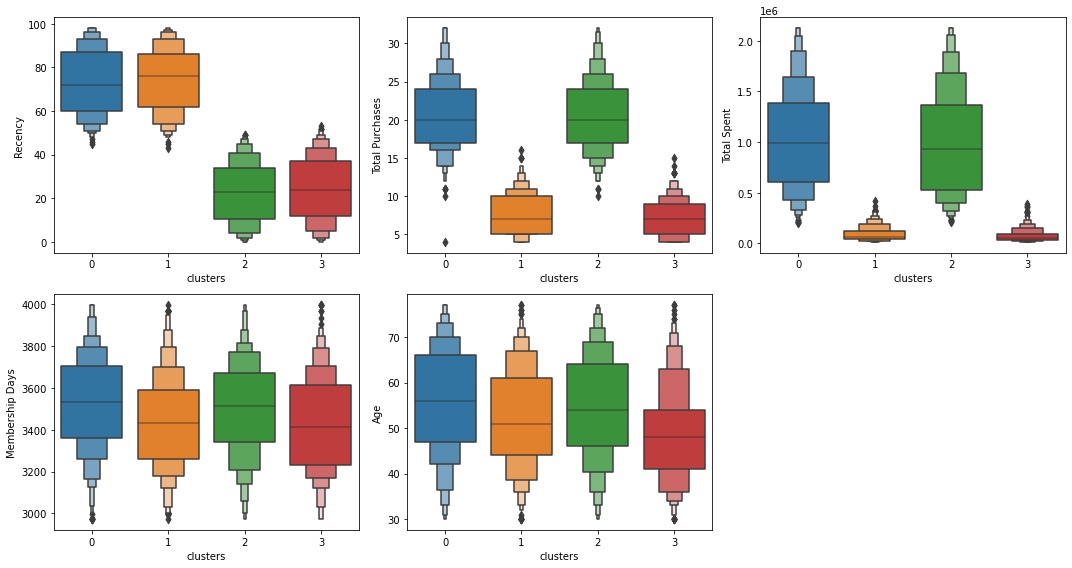

In [ ]:
df_clust = df_cluster.copy()
df_clust.rename(columns={'R':'Recency','F':'Total Purchases','M':'Total Spent','L':'Membership Days','C':'Age'}, inplace=True)
clust = df_clust.columns.drop('clusters')

plt.figure(figsize= (15, 8))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_cluster['clusters'], y=df_clust[clust[i]])
    plt.tight_layout()

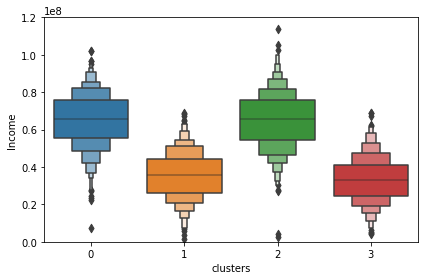

In [ ]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['clusters'], y=df_final['Income'])
plt.ylim(0, 120000000)
plt.tight_layout()

In [ ]:
df_final['Clusters'] = kmeans.labels_
df_final.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,cvr,Age,Age_Group,Total_Spent,NumChildren,Dt_Days_Customer,Clusters
0,S1,Lajang,58138000.000,2012-04-09,58,7,0,0,25,3.571,65,Senior Citizen,1617000,0,3939,0
1,S1,Lajang,46344000.000,2014-08-03,38,5,0,0,6,1.200,68,Senior Citizen,27000,2,3093,3
2,S1,Bertunangan,71613000.000,2013-08-21,26,4,0,0,21,5.250,57,Middle Aged,776000,0,3440,2
3,S1,Bertunangan,26646000.000,2014-10-02,26,6,0,0,8,1.333,38,Adult,53000,1,3033,3
4,S3,Menikah,58293000.000,2014-01-19,94,5,0,0,19,3.800,41,Middle Aged,422000,1,3289,0


In [ ]:
df_age_clust = df_final.groupby(['Clusters', 'Age_Group']).agg({'Education':'count'}).reset_index()
df_age_clust = df_age_clust.rename(columns={'Education':'total_customers'})
df_age_clust['sum_customers'] = df_age_clust['total_customers'].sum()
df_age_clust['pct'] = round((df_age_clust['total_customers']/df_age_clust['sum_customers'])*100, 2)
df_age_clust

,Clusters,Age_Group,total_customers,sum_customers,pct
0,0,Adult,65,2240,2.900
1,0,Middle Aged,314,2240,14.020
2,0,Senior Citizen,269,2240,12.010
3,1,Adult,71,2240,3.170
4,1,Middle Aged,293,2240,13.080
5,1,Senior Citizen,129,2240,5.760
6,2,Adult,59,2240,2.630
7,2,Middle Aged,333,2240,14.870
8,2,Senior Citizen,219,2240,9.780
9,3,Adult,106,2240,4.730


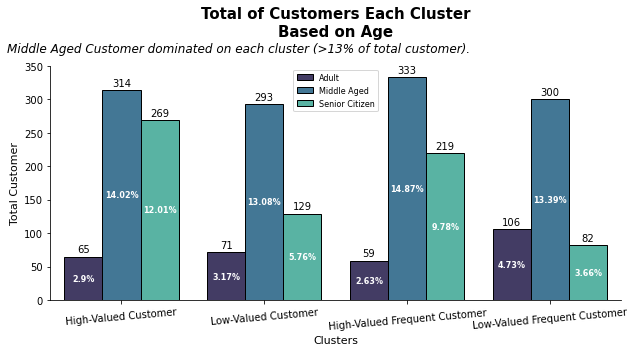

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)
sns.barplot(x='Clusters', y='total_customers', data=df_age_clust, hue='Age_Group', edgecolor='black', palette='mako')
plt.text(x=-0.8, y=370, s="Middle Aged Customer dominated on each cluster (>13% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('Clusters', fontsize=11)
plt.xticks(np.arange(4), ['High-Valued Customer', 'Low-Valued Customer', 'High-Valued Frequent Customer', 'Low-Valued Frequent Customer'], rotation=5)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 350)
plt.legend(prop={'size':8}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
plt.bar_label(ax.containers[0], ['2.9%', '3.17%', '2.63%', '4.73%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['14.02%', '13.08%', '14.87%', '13.39%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[2], ['12.01%', '5.76%', '9.78%', '3.66%'], label_type='center', color='white', weight='bold', fontsize=8)
sns.despine()
plt.tight_layout()

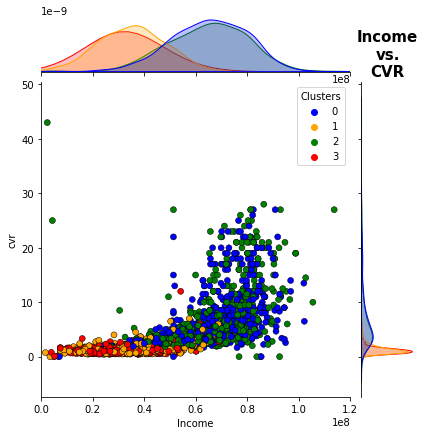

In [ ]:
plot = sns.jointplot(x=df_final['Income'], y=df_final['cvr'], hue=df_final['Clusters'], edgecolor='black', palette=['blue','orange','green','red'])
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.show()

In [ ]:
display(df_final.groupby('Clusters').describe(include='all'))

Education                                                           \
             count unique top freq first last mean  std  min  25%  50%  75%   
Clusters                                                                      
0              648      5  S1  332   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1              493      5  S1  249   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2              611      4  S1  320   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3              488      5  S1  226   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

              Marital_Status                                                 \
          max          count unique      top freq first last mean  std  min   
Clusters                                                                      
0         NaN            648      5  Menikah  248   NaN  NaN  NaN  NaN  NaN   
1         NaN            493      5  Menikah  171   NaN  NaN  NaN  NaN  NaN   
2         NaN            611      6  Menikah  234   NaN  NaN  NaN  NaN  NaN   
3         NaN            488      6  Menikah  211   NaN  NaN  NaN  NaN  NaN   

                              Income                                          \
          25%  50%  75%  max   count unique top freq first last         mean   
Clusters                                                                       
0         NaN  NaN  NaN  NaN 648.000    NaN NaN  NaN   NaN  NaN 65468816.358   
1         NaN  NaN  NaN  NaN 493.000    NaN NaN  NaN   NaN  NaN 35865053.753   
2         NaN  NaN  NaN  NaN 611.000    NaN NaN  NaN   NaN  NaN 65268898.527   
3         NaN  NaN  NaN  NaN 488.000    NaN NaN  NaN   NaN  NaN 34894474.385   

                                                                          \
                  std         min          25%          50%          75%   
Clusters                                                                   
0        14867115.156 7144000.000 55257500.000 65795500.000 76071250.000   
1        14729096.666 1730000.000 26150000.000 35790000.000 44159000.000   
2        15986129.604 2447000.000 54453000.000 65488000.000 76029500.000   
3        32101546.570 4023000.000 24643500.000 33173000.000 41335000.000   

                       Dt_Customer                                   \
                   max       count unique                  top freq   
Clusters                                                              
0        157243000.000         648    389  2012-08-31 00:00:00    7   
1        156924000.000         493    328  2013-05-04 00:00:00    5   
2        160803000.000         611    383  2012-12-09 00:00:00    5   
3        666666000.000         488    312  2014-05-19 00:00:00    5   

                                                                             \
                        first                 last mean  std  min  25%  50%   
Clusters                                                                      
0         2012-01-08 00:00:00  2014-12-05 00:00:00  NaN  NaN  NaN  NaN  NaN   
1         2012-01-08 00:00:00  2014-12-03 00:00:00  NaN  NaN  NaN  NaN  NaN   
2         2012-01-10 00:00:00  2014-12-05 00:00:00  NaN  NaN  NaN  NaN  NaN   
3         2012-01-08 00:00:00  2014-12-06 00:00:00  NaN  NaN  NaN  NaN  NaN   

                   Recency                                                  \
          75%  max   count unique top freq first last   mean    std    min   
Clusters                                                                     
0         NaN  NaN 648.000    NaN NaN  NaN   NaN  NaN 73.015 14.946 45.000   
1         NaN  NaN 493.000    NaN NaN  NaN   NaN  NaN 74.432 14.724 43.000   
2         NaN  NaN 611.000    NaN NaN  NaN   NaN  NaN 22.918 14.028  0.000   
3         NaN  NaN 488.000    NaN NaN  NaN   NaN  NaN 24.576 14.862  0.000   

                                     NumWebVisitsMonth                        \
            25%    50%    75%    max             count unique top freq first   
Clusters                                        

# **Interpretation Customer Summary**

***
1. High-Valued Customer (Cluster 0):
- There are 648 customers (28.93% of total customers) on this group
- Customers on this group have `high average recency (73 days)` and `high average of total purchases (21 items)` it means they are not frequent shoppers but `they spend a lot on our platform (around IDR 1M/year)`
- This group dominated by 48.46% customers at Middle-Aged (45-64 years old), mostly they have 1 children and they have highest average income (around IDR 65M/year) with low average web visits each month (4 times)
***
2. Low-Valued Customer (Cluster 1):
- There are 493 customers (22.01% of total customers) on this group
- Customers on this group have `highest average recency (74 days)` and `low average of total purchases (8 items)` it means they are not frequent shoppers and `they spend a little on our platform (around IDR 92K/year)`
- This group dominated by 59.43% customers at Middle-Aged (45-64 years old), mostly they have 1 children and they have average income (around IDR 36M/year) with hig average web visits each month (6 times)
***
3. High-Valued Frequent Customer (Cluster 2):
- There are 611 customers (27.28% of total customers) on this group
- Customers on this group have `low average recency (23 days)` and `high average of total purchases (21 items)` it means they are frequent shoppers and `they spend a lot on our platform (around IDR 989K/year)`
- This group dominated by 54.5% customers at Middle-Aged (45-64 years old), mostly they have 1 children and they have average income (around IDR 65M/year) with low average web visits each month (4 times)
***
4. Low-Valued Frequent Customer (Cluster 3):
- There are 488 customers (21.79% of total customers) on this group
- Customers on this group have `high average recency (24 days)` and `lowest average of total purchases (7 items)` it means they are frequent shoppers but `they spend a little on our platform (around IDR 75K/year)`
- This group dominated by 61.48% customers at Middle-Aged (45-64 years old),mostly they have 1 children and they have average income (around IDR 35M/year) with high average web visits each month (6 times)
***

# **Business Recommendation**

*Actionable Insights*:

1. Create membership tier program to keep customer retention also membership tier things will attract customers to shopping more on our platform. Let's say we have 4 membership tier (`Platinum, Gold, Silver, Bronze`) each membership tier has different privilages as customers. The highest membership tier they have, the greatest privilages they will get. On this case, we can give membership tier based on customer clusters (`Platinum: High-Valued Customer, Gold: High-Valued Frequent Customer, Silver: Low-Valued Frequent Customer, Bronze: Low-Valued Customer`)
2. Prioritize to focus on High-Valued Customers group to avoid the risk of churn. Keep monitoring theirs purchases trend and keep their retention such as improve our service, after sales treatment, quality of our products and apps. Beside that, we can give them the highest membership tier (`Platinum Tier`) at this case we can give them more discounts, promotions and free-shipping cost than any membership tier to make them shopping on our platform more frequent
3. Give High-Valued Frequent Customer group more promotions or free-shipping cost coupon through our membership tier program to make them shopping on our platform more frequent.
4. Since on Low-Valued Frequent Customer and Low-Valued Customer have lowest total spend on our platform, we should create more personalization ads, promotions or campaign for low cost products to attract this groups to shopping on our platform. Potentially this strategy will improve they recency (to low) and total of purchases (to high) on low cost products.


*Potential Impact (Quantitative)*:
- If we keep prioritize on Customer Groups/Clusters and they do not turn to churn, we still have potential GMV around `IDR 1.3B/year` (High-Valued Customer=IDR 670M/year; Low-Valued Customer=IDR 46M/year; Low-Valued Frequent Customer=IDR 604M/year; Low-Valued Customer=IDR 47M/year)

In [ ]:
print('Total Spent of High-Valued Customer: '+str(df_final[df_final['Clusters']==0].Total_Spent.sum()))
print('Total Spent of Low-Valued Customer: '+str(df_final[df_final['Clusters']==1].Total_Spent.sum()))
print('Total Spent of High-Valued Frequent Customer: '+str(df_final[df_final['Clusters']==2].Total_Spent.sum()))
print('Total Spent of Low-Valued Frequent Customer: '+str(df_final[df_final['Clusters']==3].Total_Spent.sum()))
print('Total Spent: '+str(670167000+45617000+604441000+36763000))

Total Spent of High-Valued Customer: 670167000
Total Spent of Low-Valued Customer: 45617000
Total Spent of High-Valued Frequent Customer: 604441000
Total Spent of Low-Valued Frequent Customer: 36763000
Total Spent: 1356988000
